In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("virat.csv")

In [3]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [4]:
df.Runs.value_counts()
#df.Price = df.Price.apply(lambda x : 0 if x == '0' else float(x[1:]))
df.Runs = df.Runs.apply(lambda x : x if (x[-1] != '*') else int(x[:-1]))

In [5]:
df.Runs = df.Runs.astype(int)
df.Runs.describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


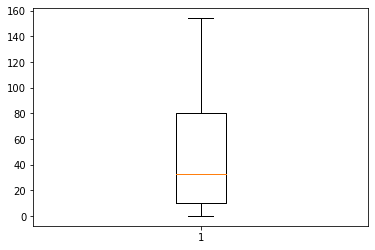

In [6]:
plt.boxplot(df.Runs)
plt.show()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [7]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [8]:
df["Year"] = df["Start Date"].apply(lambda x : x[-2:])


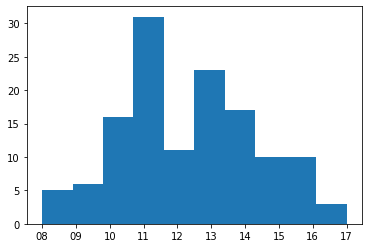

In [9]:
plt.hist(df["Year"])
plt.show()

In [10]:
year = df.groupby(by="Year")
states = year.sum()
states.head()

,Runs,BF,4s,6s,Pos,Inns
Year,,,,,,
08,159,239,21,1,7,7
09,230,257,26,1,29,9
10,726,829,69,4,50,26
11,1302,1500,121,7,119,49
12,444,538,36,1,34,17


In [11]:
states["Avg"] = states.Runs / states.Inns
states

,Runs,BF,4s,6s,Pos,Inns,Avg
Year,,,,,,,
08,159,239,21,1,7,7,22.714286
09,230,257,26,1,29,9,25.555556
10,726,829,69,4,50,26,27.923077
11,1302,1500,121,7,119,49,26.571429
12,444,538,36,1,34,17,26.117647
13,1100,1088,120,19,69,36,30.555556
14,995,976,89,19,56,28,35.535714
15,304,376,15,7,33,15,20.266667
16,739,739,62,8,30,16,46.187500


In [12]:
df.sort_values(by= "Runs", ascending =False)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Year
126,154,202,134,16,1,114.92,3,not out,2,v New Zealand,Mohali,23-Oct-16,16
108,139,192,126,12,3,110.31,4,not out,2,v Sri Lanka,Ranchi,16-Nov-14,14
117,138,202,140,6,5,98.57,3,caught,1,v South Africa,Chennai,22-Oct-15,15
96,136,157,122,16,2,111.47,3,bowled,2,v Bangladesh,Fatullah,26-Feb-14,14
66,128,187,119,12,1,107.56,3,not out,2,v Sri Lanka,Colombo (RPS),31-Jul-12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,1,1,0,0,0,3,caught,1,v England,Dharamsala,27-Jan-13,13
42,0,1,1,0,0,0,3,lbw,2,v West Indies,North Sound,11-Jun-11,11
68,0,9,5,0,0,0,3,bowled,1,v Pakistan,Chennai,30-Dec-12,12
15,0,3,0,0,0,-,3,run out,1,v Zimbabwe,Bulawayo,28-May-10,10


In [13]:
#Solution
pd.pivot_table(df, values='Runs',columns=['Year'], aggfunc=np.mean)
pd.pivot_table(df, values='Runs',columns=['Year'], aggfunc=np.max)

Year,08,09,10,11,12,13,14,15,16,17
Runs,54,107,118,117,128,115,139,138,154,122


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [21]:
df.Mins.value_counts()
df2 = df[~(df['Mins']== "-")]
df2.Mins.astype(int)

0       33
1       82
2       40
3       87
4       45
      ... 
127     64
128    152
129    147
130      6
131     81
Name: Mins, Length: 126, dtype: int32

(array([12., 10., 10.,  6., 10.,  8., 11.,  7.,  7.,  9.,  7.,  7.,  7.,
         8.,  7.]),
 array([ 0.        ,  6.06666667, 12.13333333, 18.2       , 24.26666667,
        30.33333333, 36.4       , 42.46666667, 48.53333333, 54.6       ,
        60.66666667, 66.73333333, 72.8       , 78.86666667, 84.93333333,
        91.        ]),
 <BarContainer object of 15 artists>)

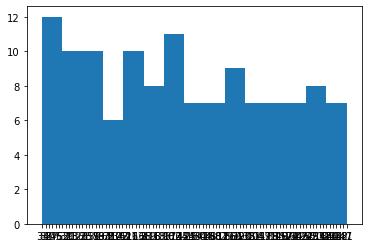

In [23]:
#?plt.hist
plt.hist(df2.Mins, bins = 15)
#df.Mins.describe()

In [16]:
#Your code here